<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-Problem:" data-toc-modified-id="Example-Problem:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example Problem:</a></span></li><li><span><a href="#Solution" data-toc-modified-id="Solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solution</a></span><ul class="toc-item"><li><span><a href="#Sorting-Eigenpairs" data-toc-modified-id="Sorting-Eigenpairs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sorting Eigenpairs</a></span></li><li><span><a href="#Projection-of-feature-vector-in-one-dimensional-feature-space" data-toc-modified-id="Projection-of-feature-vector-in-one-dimensional-feature-space-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Projection of feature vector in one-dimensional feature space</a></span></li><li><span><a href="#Reconstruction-of-feature-vector" data-toc-modified-id="Reconstruction-of-feature-vector-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reconstruction of feature vector</a></span></li></ul></li><li><span><a href="#Iris-Dataset" data-toc-modified-id="Iris-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Iris Dataset</a></span></li></ul></div>

In [1]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
#======= set default plotting properties =======
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.color'] = 'b'
plt.rcParams['figure.figsize'] = 7, 4.5 # default figure size
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Example Problem:
Given the following sets of feature vector belonging to two classes $\omega_1$ and $\omega_2$ which is Gaussian distributed.

$$\begin{gathered}
  \left\{ {\left( {\begin{array}{*{20}{c}}
  1 \\ 
  2 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  3 \\ 
  5 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  4 \\ 
  3 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  5 \\ 
  6 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  7 \\ 
  5 
\end{array}} \right)} \right\} \in {\omega _1} \hfill \\
  \left\{ {\left( {\begin{array}{*{20}{c}}
  6 \\ 
  2 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  9 \\ 
  4 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  {10} \\ 
  1 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  {12} \\ 
  3 
\end{array}} \right),\left( {\begin{array}{*{20}{c}}
  {13} \\ 
  6 
\end{array}} \right)} \right\} \in {\omega _2} \hfill \\ 
\end{gathered} $$

The vector are projected onto a line to represent the feature vectors by a single feature. 

## Solution
For the best representation of the feature vector class labels are not required. Therefore, we can consider all the feature vectors to compute the one-dimensional representation of the feature vectors.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
X = np.asarray([[1,2],
     [3,4],
     [4,3],
     [5,5],
     [7,5],
     [6,2],
     [9,4],
     [7,3],
     [11,4],
     [13,6]])
print(X.shape)

(10, 2)


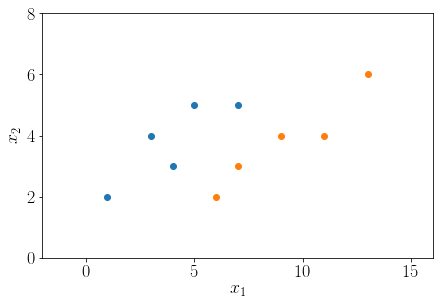

In [10]:
plt.scatter(X[:5,0],X[:5,1])
plt.scatter(X[5:,0],X[5:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-2,16])
plt.ylim([0,8])
plt.savefig('scatterPlot.pdf')

In [ ]:
import numpy as np
mean_vec = np.mean(X, axis=0)
print('Mean Vector',mean_vec)
zeroCentered_X = X-mean_vec
std_vec = np.std(X,axis = 0)
print('Standard deviation',std_vec)
# X_std = (X-mean_vec)/std_vec

scatter_X = (X - mean_vec).T.dot((X - mean_vec))
print('Scatter matrix = \n%s' %scatter_X)

In [ ]:
import numpy as np

eig_vals, eig_vecs = np.linalg.eig(scatter_X)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

### Sorting Eigenpairs

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

In [ ]:
A = eig_vecs
A = A.reshape(2,-1)
A

### Projection of feature vector in one-dimensional feature space

In [ ]:
P = X.dot(A)
P = P.reshape(10,-1)  # P is the projection matrix
P

### Reconstruction of feature vector

In [ ]:
P.dot(A.T)

## Iris Dataset 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from matplotlib import cm
plt.rcParams['figure.figsize'] = 14, 10 # default figure size
mpl.rcParams['font.size'] = 16
#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#ploting scatter graph of species comparing all features to each other
scatter_matrix(dataframe, c=iris['target'], 
                        marker='o', 
                        hist_kwds={'bins': 20}, edgecolor='k',
                        s=40, cmap = cm.jet)
plt.savefig('ScatterIris.pdf')
plt.show()

In [ ]:
# Load the data
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 7, 4.5 # default figure size
mpl.rcParams['font.size'] = 18
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

X_reduced = PCA(n_components=2).fit_transform(iris.data)
X_reduced.shape
# The indices of the features that we are plotting
x_index = 0
y_index = 1

color = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=iris.target,edgecolor='k', s=40)
plt.legend(handles=scatter.legend_elements()[0], labels=color,fontsize=14)
plt.xlabel('1st eigenvector, $e_1$')
plt.ylabel('2nd eigenvector, $e_2$')

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

plt.tight_layout()
plt.savefig('2dPCA.pdf')
plt.show()

In [ ]:
# Load the data
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

X_reduced = PCA(n_components=3).fit_transform(iris.data)
X_reduced.shape
# The indices of the features that we are plotting
x_index = 0
y_index = 1

color = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=250)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
            edgecolor='k', s=40)

ax.legend(handles=scatter.legend_elements()[0], labels=color,fontsize=14)
ax.set_xlabel("1st eigenvector, $e_1$")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector, $e_2$")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector, $e_3$")
ax.w_zaxis.set_ticklabels([])

plt.savefig('3dPCA.pdf')
plt.show()

## Linear Discriminant Analysis

In [13]:
import numpy as np
from matplotlib import pyplot as plt
X1 = np.asarray([[1,2],
     [3,4],
     [4,3],
     [5,5],
     [7,5]])
        
X2 = np.asarray([[6,2],
                 [9,4],
                 [7,3],
                 [11,4],
                 [13,6]])
print(X1.shape,X2.shape)

(5, 2) (5, 2)


In [14]:
mean_vec1 = np.mean(X1, axis=0)
print('Mean Vector',mean_vec1)

scatter_X1 = (X1 - mean_vec1).T.dot((X1 - mean_vec1))
print('Scatter matrix = \n%s' %scatter_X1)

Mean Vector [4.  3.8]
Scatter matrix = 
[[20.  10. ]
 [10.   6.8]]


In [15]:
mean_vec2 = np.mean(X2, axis=0)
print('Mean Vector',mean_vec2)

scatter_X2 = (X2 - mean_vec1).T.dot((X2 - mean_vec1))
print('Scatter matrix = \n%s' %scatter_X2)

Mean Vector [9.2 3.8]
Scatter matrix = 
[[168.   16.2]
 [ 16.2   8.8]]


In [17]:
Sw=scatter_X1+scatter_X2
Sw

array([[188. ,  26.2],
       [ 26.2,  15.6]])

In [20]:
Sw_inv = np.linalg.inv(Sw)
Sw_inv

array([[ 0.00694457, -0.01166331],
       [-0.01166331,  0.08369095]])

In [26]:
w = np.dot(Sw_inv,(mean_vec1-mean_vec2))

In [28]:
w_hat = w / np.linalg.norm(w)
w_hat

array([-0.51159917,  0.85922424])